In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from glicko_rating_matches import DEFAULT_SIGMA, DEFAULT_TAU

In [2]:
def get_error(ratings):
    mae = ratings["error"].sum() / ratings["games"].sum()
    mse = ratings["error_square"].sum() / ratings["games"].sum()
    return mae, mse

In [3]:
print(DEFAULT_SIGMA, DEFAULT_TAU)

2.0 0.2


In [4]:
ratings = pd.read_csv(
    "./csv/glicko_rating/glicko_rating_2023.csv", parse_dates=["last_game_date"]
)
ratings

,team,league,games,win,loss,winrate,streak,point,rd,sigma,error,error_square,last_game_date
0,JD Gaming,LPL,719,423,296,0.588317,0,2147.755269,86.738337,1.822178,289.561952,150.912920,2023-05-18 15:20:00
1,T1,LCK,1430,950,480,0.664336,0,2118.570882,86.646368,1.791530,553.898526,298.820428,2023-05-18 15:20:00
2,Gen.G,LCK,1012,604,408,0.596838,0,2057.240731,85.748149,1.758001,423.557812,230.434972,2023-05-19 14:01:00
3,Bilibili Gaming,LPL,529,273,256,0.516068,0,2056.235329,85.614777,1.718115,239.869168,127.683094,2023-05-19 14:01:00
4,KT Rolster,LCK,1045,619,426,0.592344,0,1976.547847,85.205233,1.731988,427.056006,231.487561,2023-04-08 09:04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
590,Bencheados,CLS,38,7,31,0.184211,0,1242.148547,69.949942,1.955764,14.742676,6.479132,2017-03-30 23:23:00
591,Hurricane Gaming,PCS,165,48,117,0.290909,0,1234.336590,25.392202,1.701364,63.394332,31.440067,2022-03-19 11:00:00
592,V3 Esports,LJL,286,119,167,0.416084,0,1208.192546,60.808053,1.525028,111.881300,58.506658,2023-03-25 11:16:00
593,Gravitas,LCO,161,37,124,0.229814,0,1171.299818,55.121838,1.651872,55.893948,28.143311,2022-08-09 09:16:00


In [5]:
mae, mse = get_error(ratings)
print(mae, mse)

0.41550252602785737 0.2159986218061342


In [6]:
columns = ["tau", "sigma", "mae", "mse"]
columns

['tau', 'sigma', 'mae', 'mse']

In [7]:
error_df = pd.read_csv("./csv/glicko_rating_error.csv")
error_df

,tau,sigma,mae,mse
0,0.2,0.06,0.443499,0.225247
1,0.3,0.06,0.443510,0.225257
2,0.4,0.06,0.443526,0.225272
3,0.5,0.06,0.443545,0.225290
4,0.6,0.06,0.443568,0.225312
5,0.7,0.06,0.443595,0.225338
6,0.8,0.06,0.443626,0.225367
7,0.9,0.06,0.443660,0.225398
8,1.0,0.06,0.443696,0.225433
9,1.1,0.06,0.443736,0.225470


In [8]:
df = pd.DataFrame([[DEFAULT_TAU, DEFAULT_SIGMA, mae, mse]], columns=columns)
df

,tau,sigma,mae,mse
0,0.2,2.0,0.415503,0.215999


In [9]:
error_df = pd.concat([error_df, df], ignore_index=True)
error_df

,tau,sigma,mae,mse
0,0.2,0.06,0.443499,0.225247
1,0.3,0.06,0.443510,0.225257
2,0.4,0.06,0.443526,0.225272
3,0.5,0.06,0.443545,0.225290
4,0.6,0.06,0.443568,0.225312
5,0.7,0.06,0.443595,0.225338
6,0.8,0.06,0.443626,0.225367
7,0.9,0.06,0.443660,0.225398
8,1.0,0.06,0.443696,0.225433
9,1.1,0.06,0.443736,0.225470


In [10]:
error_df.loc[error_df["mae"] == error_df["mae"].min()]

,tau,sigma,mae,mse
13,0.2,2.0,0.415503,0.215999


In [11]:
error_df.loc[error_df["mse"] == error_df["mse"].min()]

,tau,sigma,mae,mse
11,0.2,0.6,0.422185,0.215879


In [12]:
error_df.to_csv("./csv/glicko_rating_error.csv", index=False)

<Axes: xlabel='tau', ylabel='mae'>

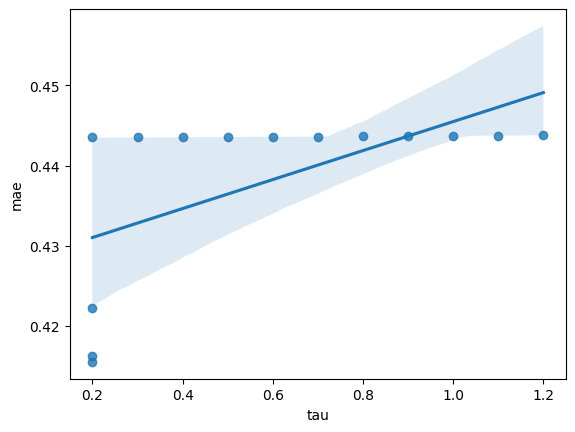

In [13]:
sns.regplot(error_df, x="tau", y="mae")

<Axes: xlabel='sigma', ylabel='mae'>

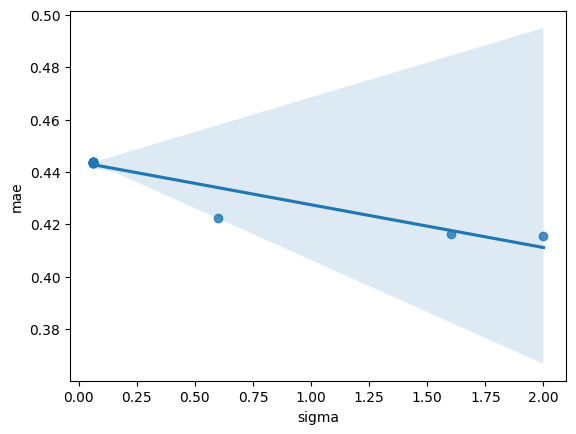

In [14]:
sns.regplot(error_df, x="sigma", y="mae")